In [34]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import statistics

In [46]:
df_short = pd.read_csv("data/processed/processed_short.csv")
df_medium = pd.read_csv("data/processed/processed_medium.csv")
df_long = pd.read_csv("data/processed/processed_long.csv")

# Word CLouds, and other statistics

In [51]:
def generate_statistics(dataframe):
    name =[x for x in globals() if globals()[x] is dataframe][0]
    lengths = []
    bag = []
    for ind in dataframe.index:
        word_list = []
        word_list = dataframe["text"][ind].split()
        lengths.append(len(word_list))
        bag += word_list
    
    print("The average document length in " + str(name) + " is " + str(statistics.mean(lengths)) + " words")
    print(" ")
    print("The ratio of labels in " + str(name) + " is:")
    print(dataframe["label"].value_counts(normalize=True))
    all_words_count = Counter(bag)
    wordcloud_all = WordCloud(stopwords=set(STOPWORDS),width = 1000, height = 1000, background_color='white').generate_from_frequencies(all_words_count)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud_all)
    plt.axis("off")
    plt.show()
    wordcloud_all.to_file("images/" + str(name) + "_wordlcoud.png")


The average document length in df_short is 9.037023723939612 words
 
The ratio of labels in df_short is:
0    0.865744
1    0.134256
Name: label, dtype: float64


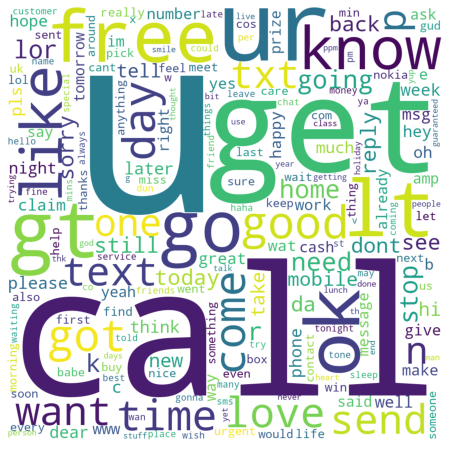

In [52]:
generate_statistics(df_short)

The average document length in df_medium is 121.373 words
 
The ratio of labels in df_medium is:
1    0.5
0    0.5
Name: label, dtype: float64


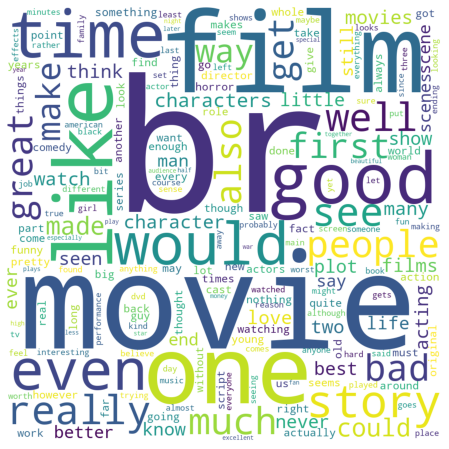

In [53]:
generate_statistics(df_medium)

The average document length in df_long is 228.10087719298247 words
 
The ratio of labels in df_long is:
1    0.560307
0    0.439693
Name: label, dtype: float64


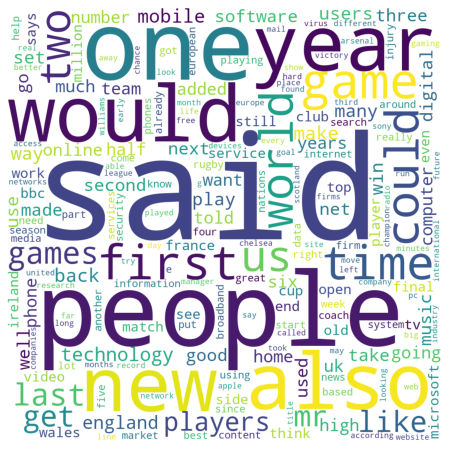

In [54]:
generate_statistics(df_long)